# Kaggle 레드 와인 품질(Red Wine Quality) 데이터 분석 및 예측

이 프로젝트는 포르투갈의 "Vinho Verde" 레드 와인 샘플 데이터를 사용하여 와인의 화학적 특성이 품질에 미치는 영향을 분석하고, 이를 기반으로 와인 품질을 분류 및 예측하는 모델을 구축하는 데 목적이 있습니다.

## 1. 데이터셋 개요
- **출처**: [Kaggle - Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
- **데이터 구성**: 1,599개의 레드 와인 샘플과 12개의 변수 (11개의 독립 변수 + 1개의 종속 변수)

## 2. 특성(Feature) 상세 설명

### 입력 변수 (화학적 성질)
1. **fixed acidity** (결합 산도): 와인의 비휘발성 산성 성분. 와인의 맛과 보존성에 기여합니다.
2. **volatile acidity** (휘발성 산도): 와인의 식초 향을 유발하는 아세트산 수치. 품질 저하 요인이 될 수 있습니다.
3. **citric acid** (구연산): 와인에 신선함과 풍미를 더해줍니다.
4. **residual sugar** (잔류 당분): 발효 후 남은 설탕 양.
5. **chlorides** (염화물): 와인에 포함된 소금의 양.
6. **free sulfur dioxide** (유리 이산화황): 산화 방지 및 미생물 번식 억제.
7. **total sulfur dioxide** (총 이산화황): 총 이산화황 함량.
8. **density** (밀도): 설탕/알코올에 따른 와인의 밀도.
9. **pH** (산성도): 와인의 산도 수치.
10. **sulphates** (황산염): 보존 효과 강화용 첨가제.
11. **alcohol** (알코올): 와인의 알코올 도수(%).

### 출력 변수 (타겟)
- **quality** (품질): 전문가 점수 (3~8 분포).

## 3. 분석 프로세스
1. **EDA**: 데이터 분포 및 상관관계 시각화
2. **전처리**: `StandardScaler`를 이용한 특성 스케일링
3. **모델링**: 8가지 ML 알고리즘 비교
4. **최적화**: 상위 4개 모델 앙상블 및 하이퍼파라미터 튜닝

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')

# 시각화 설정
%matplotlib inline
sns.set(style='whitegrid', context='talk')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
print(f"Data Loaded: {df.shape}")
df.head()

Data Loaded: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. 탐색적 데이터 분석 (EDA)

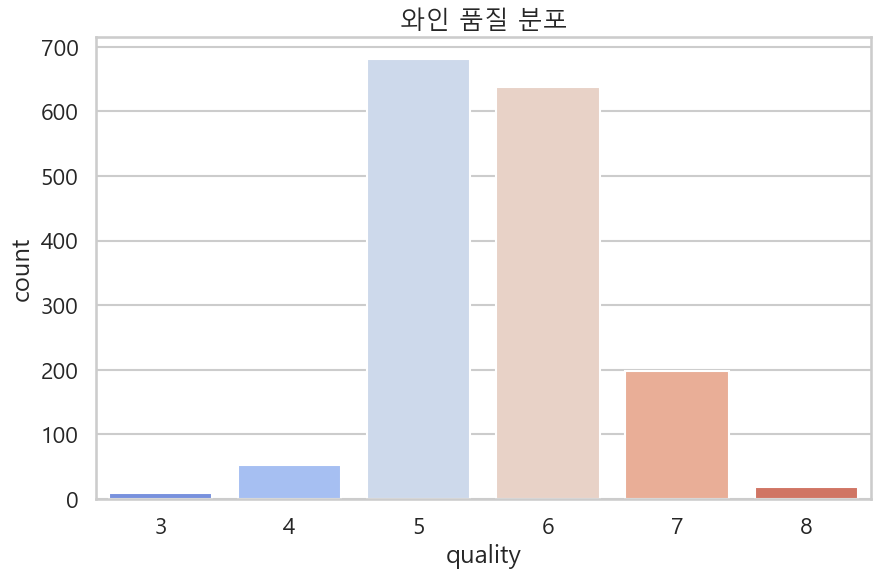

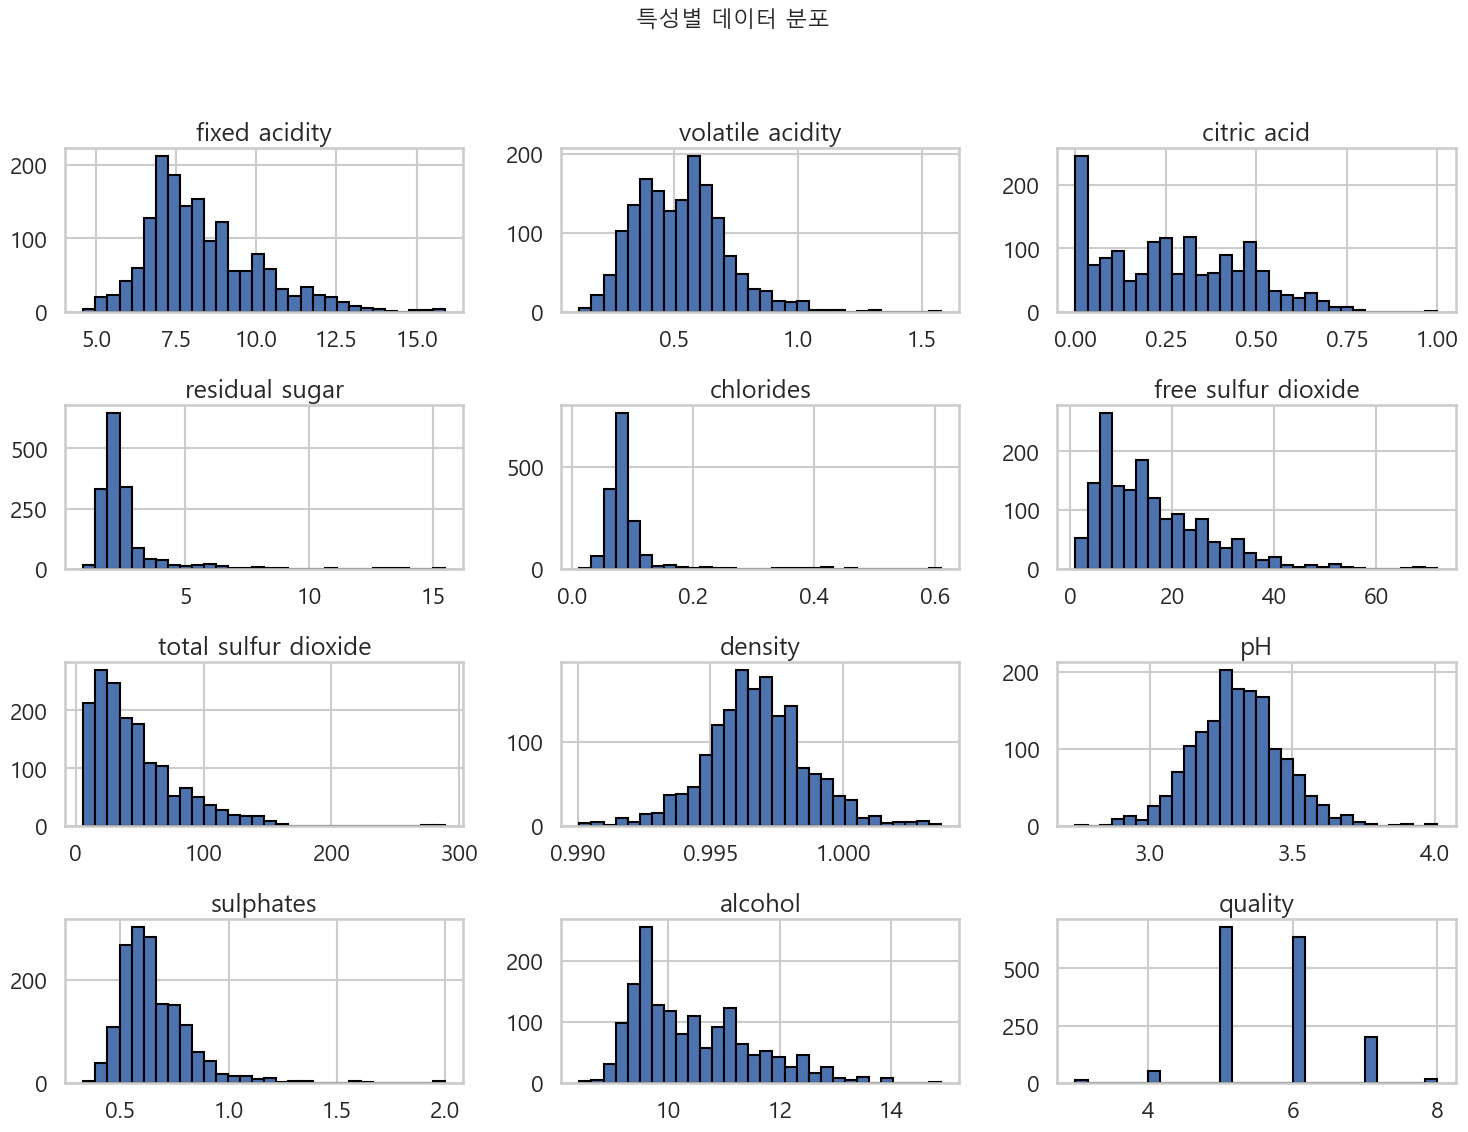

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality', palette='coolwarm')
plt.title('와인 품질 분포')
plt.show()

df.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('특성별 데이터 분포', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

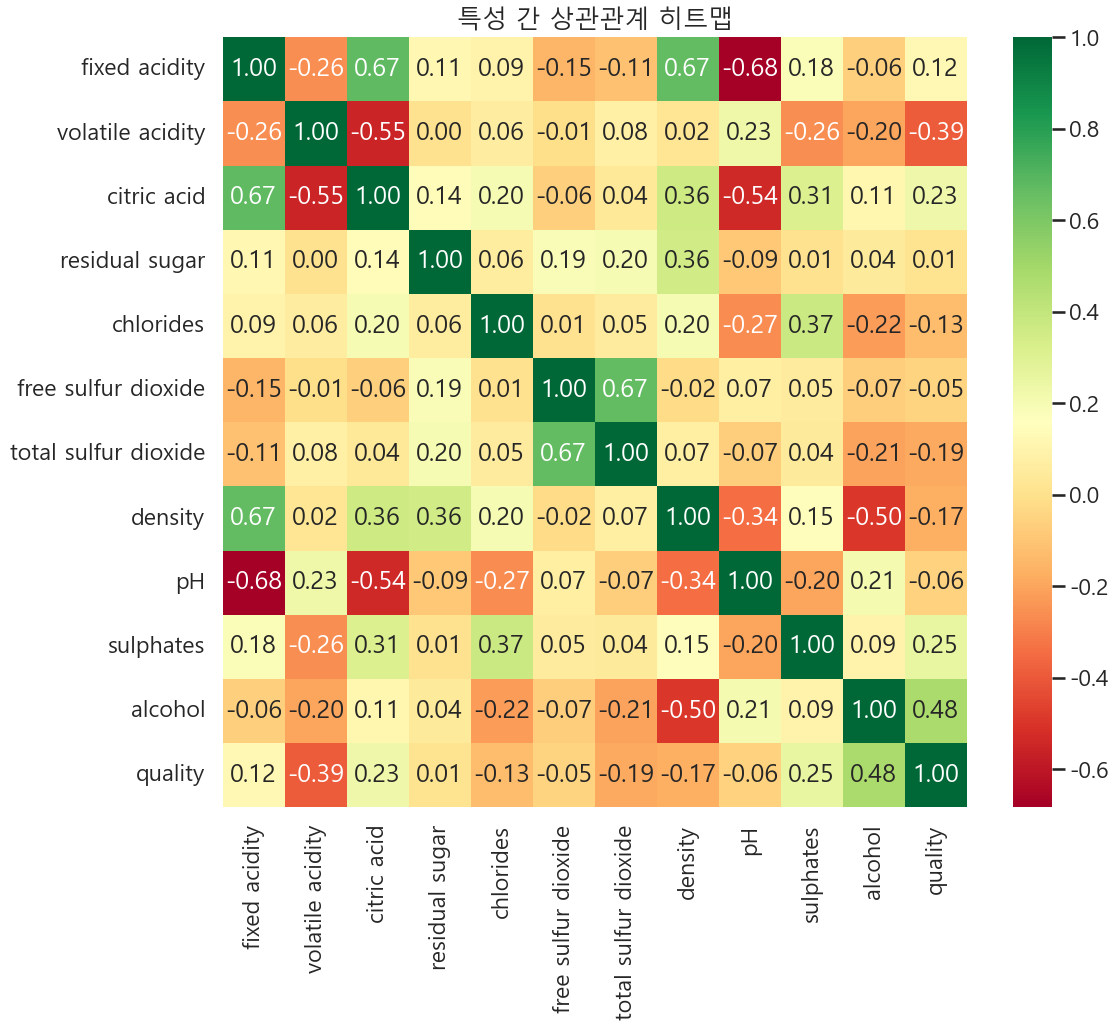

In [3]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('특성 간 상관관계 히트맵')
plt.show()

## 2. 데이터 전처리

In [5]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing Complete.")

Preprocessing Complete.


## 3. 8가지 모델 비교 분석 및 시각화

In [6]:
models = {
    'LR': LogisticRegression(max_iter=1000),
    'RF': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(random_state=42),
    'GBM': GradientBoostingClassifier(random_state=42),
    'Ada': AdaBoostClassifier(random_state=42),
    'ET': ExtraTreesClassifier(random_state=42)
}

results = []
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results.append({'Model': name, 'Accuracy': cv_scores.mean()})

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(results_df)

  Model  Accuracy
1    RF  0.677074
7    ET  0.668480
5   GBM  0.654403
2   SVC  0.625481
0    LR  0.597319
4    DT  0.589519
3   KNN  0.566075
6   Ada  0.544151


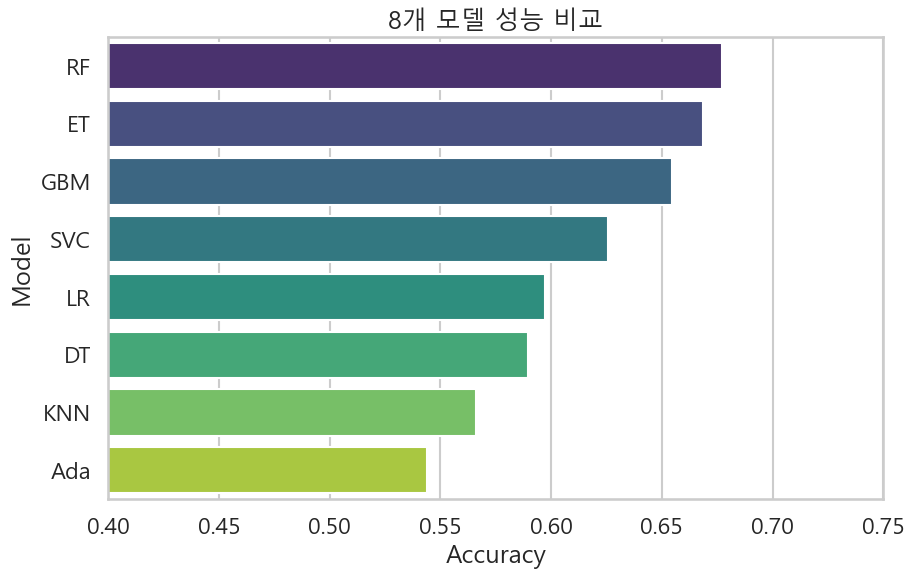

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('8개 모델 성능 비교')
plt.xlim(0.4, 0.75)
plt.show()

## 4. 상위 4개 모델 앙상블 및 최적화

In [9]:
top_4 = results_df.head(4)['Model'].values
print(f"Top 4 Models: {top_4}")

param_grids = {
    'RF': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'ET': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
    'GBM': {'n_estimators': [50, 100]},
    'SVC': {'C': [1, 10]}
}

tuned_estimators = []
for name in top_4:
    if name in param_grids:
        grid = GridSearchCV(models[name], param_grids[name], cv=3)
        grid.fit(X_train_scaled, y_train)
        tuned_estimators.append((name, grid.best_estimator_))
    else:
        tuned_estimators.append((name, models[name].fit(X_train_scaled, y_train)))

ensemble = VotingClassifier(estimators=tuned_estimators, voting='soft')
ensemble.fit(X_train_scaled, y_train)
print("Ensemble Complete.")

Top 4 Models: ['RF' 'ET' 'GBM' 'SVC']
Ensemble Complete.


## 5. 최종 결과 시각화

Final Accuracy: 0.6875
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.77      0.74       136
           6       0.66      0.72      0.69       128
           7       0.73      0.55      0.63        40
           8       0.50      0.33      0.40         3

    accuracy                           0.69       320
   macro avg       0.43      0.40      0.41       320
weighted avg       0.66      0.69      0.67       320



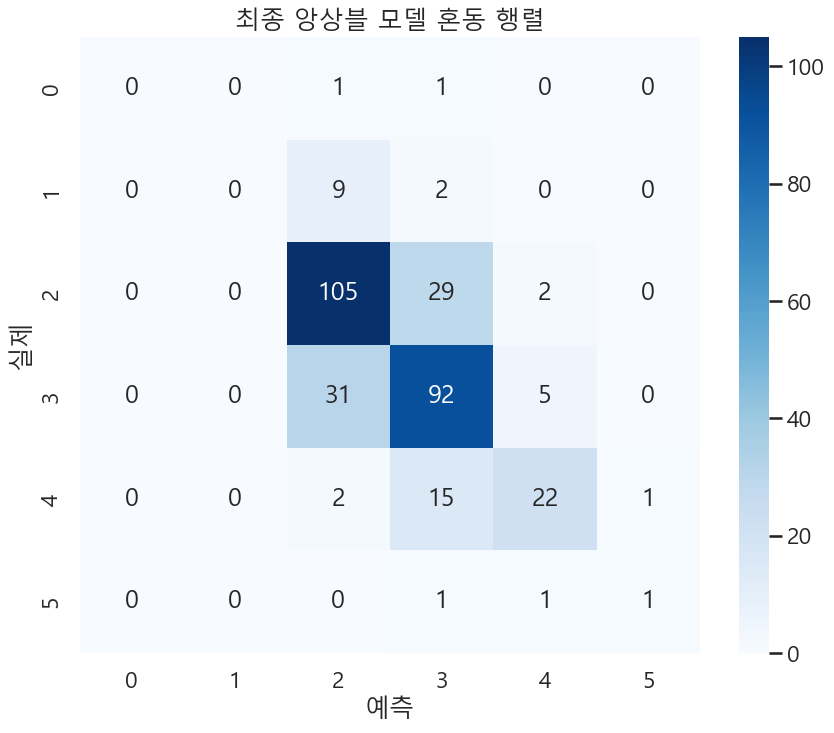

In [10]:
y_pred = ensemble.predict(X_test_scaled)
print(f"Final Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('최종 앙상블 모델 혼동 행렬')
plt.xlabel('예측')
plt.ylabel('실제')
plt.show()